# L3-C - Linear Quantization II: Per Channel Quantization

In this lesson, you will continue to learn about different granularities of performing linear quantization. You will cover `per channel` in this notebook.

Run the next cell to import all of the functions you have used before in the previous lesson(s) of `Linear Quantization II` to follow along with the video.

- To access the `helper.py` file, you can click `File --> Open...`, on the top left.

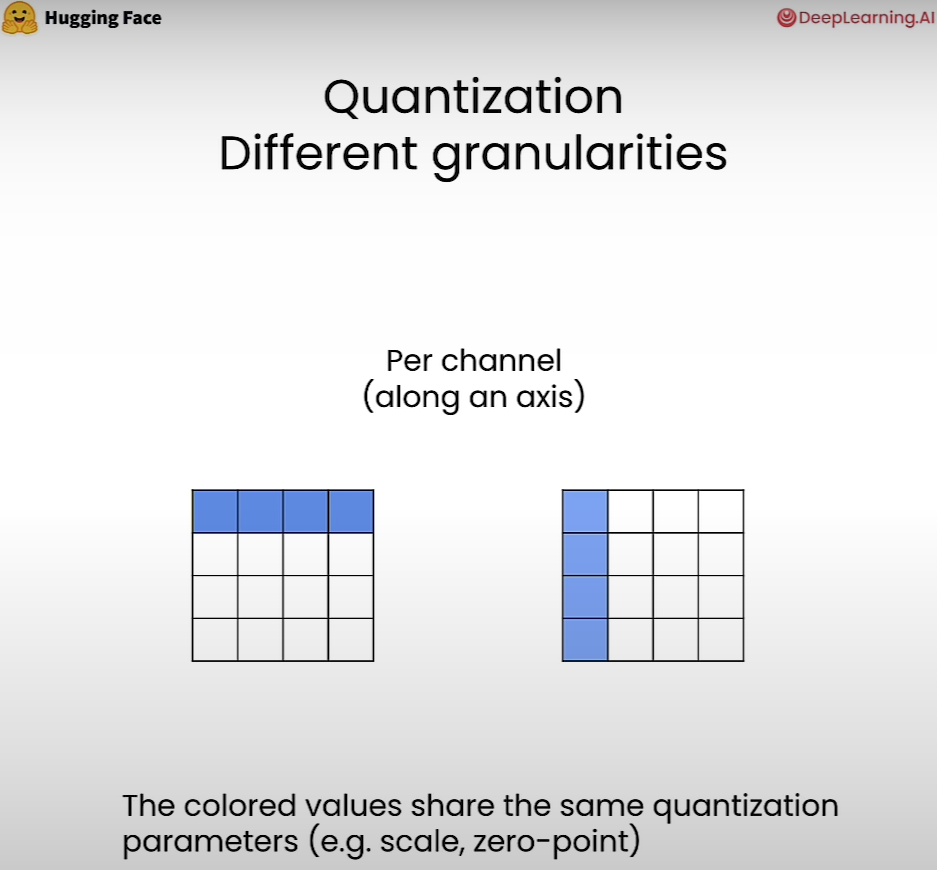

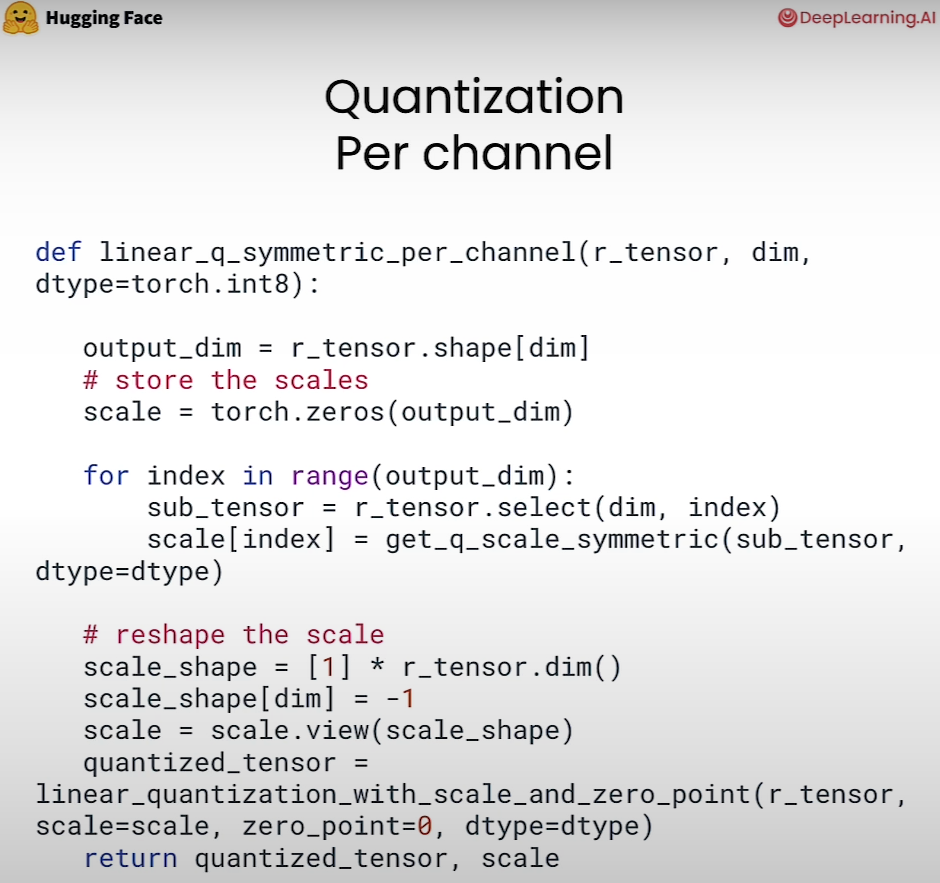

In [ ]:
import torch

from helper import get_q_scale_symmetric, linear_q_with_scale_and_zero_point, linear_dequantization
from helper import plot_quantization_errors, quantization_error

## Different Granularities for Quantization
- For simplicity, you'll perform these using Symmetric mode.

### Per Channel
- Implement `Per Channel` Symmetric Quantization
- `dim` parameter decides if it needs to be along the rows or columns
- we do per channel quantization for `8 bits` quantization mostly

In [ ]:
def linear_q_symmetric_per_channel(tensor,dim,dtype=torch.int8):



    return quantized_tensor, scale

In [ ]:
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

- `dim = 0`, along the rows
- `dim = 1`, along the columns

In [ ]:
dim=0
output_dim = test_tensor.shape[dim] # create the tensor with shape of o/p dimension with each element = 0

In [ ]:
output_dim

In [ ]:
scale = torch.zeros(output_dim)

In [ ]:
scale

- Iterate through each row to calculate its `scale`.

In [ ]:
for index in range(output_dim):
    sub_tensor = test_tensor.select(dim,index)
    # print(sub_tensor)
    scale[index] = get_q_scale_symmetric(sub_tensor)

In [ ]:
scale

In [ ]:
scale_shape = [1] * test_tensor.dim()

In [ ]:
scale_shape

In [ ]:
scale_shape[dim] = -1

In [ ]:
scale_shape

In [ ]:
scale = scale.view(scale_shape)

In [ ]:
# copy to be used later
copy_scale = scale

scale

#### Understanding tensor by tensor division using `view` function

In [ ]:
m = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
m

In [ ]:
s = torch.tensor([1,5,10])

In [ ]:
s

In [ ]:
s.shape

In [ ]:
s.view(1, 3).shape

In [ ]:
# alternate way
s.view(1, -1).shape

In [ ]:
s.view(-1,1).shape

##### Along the row division

In [ ]:
scale = torch.tensor([[1], [5], [10]])

In [ ]:
scale.shape

In [ ]:
m / scale

##### Along the column division

In [ ]:
scale = torch.tensor([[1, 5, 10]])

In [ ]:
scale.shape

In [ ]:
m / scale

#### Coming back to quantizing the tensor

In [ ]:
# the scale you got earlier
scale = copy_scale

scale

In [ ]:
scale.shape

In [ ]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale=scale, zero_point=0) # zero point = 0 as we are doing for symmetric quantization

In [ ]:
quantized_tensor

- Now, put all this in `linear_q_symmetric_per_channel` function defined earlier.

In [ ]:
def linear_q_symmetric_per_channel(r_tensor, dim, dtype=torch.int8):
    
    output_dim = r_tensor.shape[dim]
    # store the scales
    scale = torch.zeros(output_dim)

    for index in range(output_dim):
        sub_tensor = r_tensor.select(dim, index)
        scale[index] = get_q_scale_symmetric(sub_tensor, dtype=dtype)

    # reshape the scale
    scale_shape = [1] * r_tensor.dim()
    scale_shape[dim] = -1
    scale = scale.view(scale_shape)
    quantized_tensor = linear_q_with_scale_and_zero_point(
        r_tensor, scale=scale, zero_point=0, dtype=dtype)
   
    return quantized_tensor, scale

In [ ]:
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [ ]:
### along the rows (dim = 0)
quantized_tensor_0, scale_0 = linear_q_symmetric_per_channel(
    test_tensor, dim=0)

### along the columns (dim = 1)
quantized_tensor_1, scale_1 = linear_q_symmetric_per_channel(
    test_tensor, dim=1)

- Plot the quantization error for along the rows.

In [ ]:
dequantized_tensor_0 = linear_dequantization(
    quantized_tensor_0, scale_0, 0)

plot_quantization_errors(
    test_tensor, quantized_tensor_0, dequantized_tensor_0)

In [ ]:
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor_0)}""")

- Plot the quantization error for along the columns.

In [ ]:
dequantized_tensor_1 = linear_dequantization(
    quantized_tensor_1, scale_1, 0)

plot_quantization_errors(
    test_tensor, quantized_tensor_1, dequantized_tensor_1, n_bits=8)

print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor_1)}""")

    Quantization error per channel > Quantization error per tensor
    This is because outlier values will only impact the channel it was in instead of the whole tensor